##### Copyright 2019 The TensorFlow Authors.

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Addons Image: Operations

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/addons/tutorials/image_ops"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/addons/blob/master/docs/tutorials/image_ops.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/addons/blob/master/docs/tutorials/image_ops.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
      <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/addons/docs/tutorials/image_ops.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Overview
This notebook will demonstrate how to use the some image operations in TensorFlow Addons.

Here is the list of image operations we'll be covering in this example:

- `tfa.image.mean_filter2d`

- `tfa.image.rotate`

- `tfa.image.transform`

- `tfa.image.random_hsv_in_yiq`

- `tfa.image.adjust_hsv_in_yiq`

- `tfa.image.dense_image_warp`

- `tfa.image.euclidean_dist_transform`

# Setup

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [4]:
!pip install -q --no-deps tensorflow-addons~=0.6

     |████████████████████████████████| 1.8MB 9.4MB/s 


In [0]:
import numpy as np
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

# Prepare and Inspect Images

## Download the images

In [0]:
img_path = tf.keras.get_file('tensorflow.png','https://tensorflow.org/images/tf_logo.png')

## Inspect the images

### TensorFlow Icon

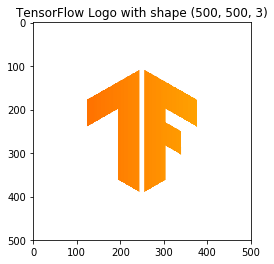

In [7]:
img_raw = tf.io.read_file(img_path)
img = tf.io.decode_image(img_raw)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, [500,500])

plt.title("TensorFlow Logo with shape {}".format(img.shape))
_ = plt.imshow(img)

### Make a black and white version

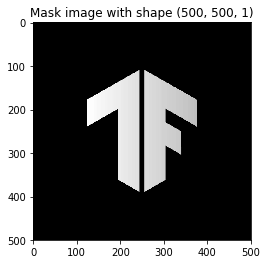

In [8]:
bw_img = 1.0 - tf.image.rgb_to_grayscale(img)

plt.title("Mask image with shape {}".format(bw_img.shape))
_ = plt.imshow(bw_img[...,0], cmap='gray')

# Play with tfa.image

## Mean filtering
Mean filtering is a filtering technique, which is often used to remove noise from an image or signal. The idea is to run through the image pixel by pixel and replacing it with the average values of neighboring pixels.

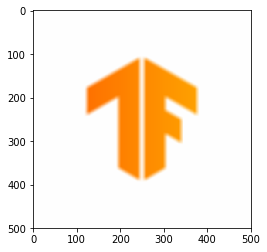

In [9]:
mean = tfa.image.mean_filter2d(img, filter_shape=11)
_ = plt.imshow(mean)

## Rotate
This operation rotates the given image by the angle (in radians) input by the user.  

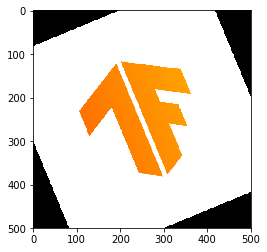

In [10]:
rotate = tfa.image.rotate(img, tf.constant(np.pi/8))
_ = plt.imshow(rotate)

## Transform
This operation transforms the given image on the basis of the transform vector given by the user. 

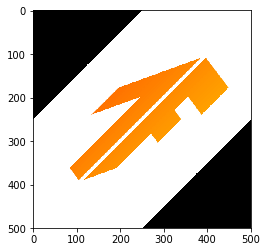

In [11]:
transform = tfa.image.transform(img, [1.0, 1.0, -250, 0.0, 1.0, 0.0, 0.0, 0.0])
_ = plt.imshow(transform)

## Random HSV in YIQ
This operation changes color scale of a given RGB image to YIQ but here delta hue and saturation values are picked randomly from the given range.

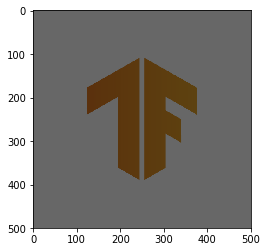

In [12]:
delta = 0.5
lower_saturation = 0.1
upper_saturation = 0.9
lower_value = 0.2
upper_value = 0.8
rand_hsvinyiq = tfa.image.random_hsv_in_yiq(img, delta, lower_saturation, upper_saturation, lower_value, upper_value)
_ = plt.imshow(rand_hsvinyiq)

## Adjust HSV in YIQ
This operation changes color scale of a given RGB image to YIQ but here instead of choosing randomly, delta hue and saturation values are inputs form the user.

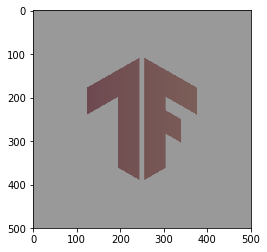

In [13]:
delta = 0.5
saturation = 0.3
value = 0.6
adj_hsvinyiq = tfa.image.adjust_hsv_in_yiq(img, delta, saturation, value)
_ = plt.imshow(adj_hsvinyiq)

## Dense Image Warp
This operation is for non-linear warp of any image specified by the flow field of the offset vector (here used random values for example). 

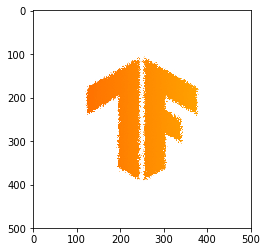

In [14]:
input_img = tf.image.convert_image_dtype(tf.expand_dims(img, 0), tf.dtypes.float32)

flow_shape = [1, input_img.shape[1], input_img.shape[2], 2]
init_flows = np.float32(np.random.normal(size=flow_shape) * 2.0)
dense_img_warp = tfa.image.dense_image_warp(input_img, init_flows)
dense_img_warp = tf.squeeze(dense_img_warp, 0)
_ = plt.imshow(dense_img_warp)

## Euclidian Distance Transform
This operation updates the pixel value with the euclidian distance from the foreground pixel to the background one.
* Note : It takes only binary image and results in transformed image. If a different image is given it results in a image with single value

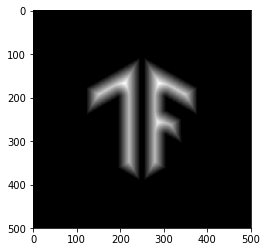

In [15]:
gray = tf.image.convert_image_dtype(bw_img,tf.uint8)
# The op expects a batch of images, so add a batch dimension
gray = tf.expand_dims(gray, 0)
eucid = tfa.image.euclidean_dist_transform(gray)
eucid = tf.squeeze(eucid, (0, -1))
_ = plt.imshow(eucid, cmap='gray')